In [1]:
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
sentences = pd.read_csv('gutenberg_sentences.csv', index_col = 0)

In [5]:
sentences

,country,sentence,book
0,Australia,This is markedly the case in the Australian pa...,gutenbergtxts\1770 Captain Cook's Journal Duri...
1,Australia,"Cook's names have rarely been altered, and New...",gutenbergtxts\1770 Captain Cook's Journal Duri...
2,New Zealand,"Cook's names have rarely been altered, and New...",gutenbergtxts\1770 Captain Cook's Journal Duri...
3,Australia,"In the case of the coast of East Australia, th...",gutenbergtxts\1770 Captain Cook's Journal Duri...
4,France,"The only fact known is that in May 1755, when ...",gutenbergtxts\1770 Captain Cook's Journal Duri...
...,...,...,...
36947,United States,"If you are outside the United States, check th...",gutenbergtxts\1961 Government and Rebellion by...
36948,United States,The Foundation makes no representations concer...,gutenbergtxts\1961 Government and Rebellion by...
36949,United States,If an individual Project Gutenberg-tm electron...,gutenbergtxts\1961 Government and Rebellion by...
36950,United States,The Foundation is committed to complying with ...,gutenbergtxts\1961 Government and Rebellion by...


In [27]:
unique_words = list(set.union(*sentences['sentence'].str.replace('[^\w\s]','').str.split(' ').map(set).to_list()))

In [30]:
len(unique_words)

51251

In [33]:
from scipy import sparse

In [44]:
from tqdm import tqdm

In [38]:
X = sparse.dok_matrix((sentences.shape[0], len(unique_words)))

In [45]:
row = 0
for sentence in tqdm(sentences['sentence'].values):
    for i, word in enumerate(unique_words):
        if word in sentence:
            X[row, i] = 1
        
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36952/36952 [18:02<00:00, 34.13it/s]


In [46]:
sentence

'International donations are gratefully accepted, but we cannot make any statements concerning tax treatment of donations received from outside the United States.'

In [50]:
X = X.tocsr()

In [51]:
import anndata

In [58]:
adata = anndata.AnnData(X, obs = sentences, var = pd.DataFrame(index = unique_words))
adata

C:\Users\vale\AppData\Roaming\Python\Python37\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 36952 × 51251
    obs: 'country', 'sentence', 'book'

In [59]:
adata.var

""
""
David
DECLARATION
testoath
did
...
AngloIndians
decease
favorite
Albion


In [60]:
adata.write('gutenberg_sentences.h5ad')

... storing 'country' as categorical
... storing 'sentence' as categorical
... storing 'book' as categorical


In [62]:
ls

 Volume in drive C is NVMe Drive
 Volume Serial Number is 9ACC-A435

 Directory of C:\Users\vale\Google Drive\Blog\201229 Opinions on countries\ubfest

14/01/2021  23:26    <DIR>          .
14/01/2021  23:26    <DIR>          ..
14/01/2021  22:06    <DIR>          .ipynb_checkpoints
14/01/2021  23:26            14,648 210114 Make word count matrix.ipynb
14/01/2021  21:52            12,258 210114 Read txt data.ipynb
14/01/2021  21:52        13,543,759 gutenberg_sentences.csv
14/01/2021  23:26        46,736,848 gutenberg_sentences.h5ad
14/01/2021  21:31    <DIR>          gutenbergtxts
14/01/2021  21:31               146 README.md
               5 File(s)     60,307,659 bytes
               4 Dir(s)  65,917,775,872 bytes free


In [69]:
frac_zeros = np.array(1 - (adata.X > 0).mean(1))[:, 0]
means = np.array((adata.X).mean(1))[:, 0]

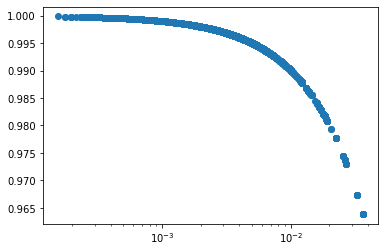

In [71]:
plt.scatter(means, frac_zeros)
plt.xscale('log')